# <span style="color:red"> Lezione 4</span>

### C++ code

* 4.1

Il codice è quello fornito. In aggiunta è stata implementata possibilità di `Restart` dall'ultima config, della simulazione precendente (per capire come "accedere" al restart si guardi nella sezione `Comandi di esecuzione`). Sono stati studiati i casi di sistema solido e liquido (`input.liquid/solid`). Il codice come output fornisce i valori istantanei delle varie grandezze termodinamiche (_temp_,_etot_,_epot_,_ekin_),e li scrive nei file `output_(grand)_(state).dat` contenuti nella directory `data`, ed essi sono così composti:

1° colonna|
----------|
grandezza|

* 4.2

Il codice è quello dell'esecizio 4.1 con in aggiunta la classe `Experiment`. Questa classe tramite il metodo `cicleblock` legge i valori istantanei delle varie grandezze termodinamiche, e li rielabora tramite media a blocchi ecc...
Tramite poi la funzione `Write` si va a scrivere le medie progessive e con le loro incertezze sui file `ave_(grand)_(state).dat` contenuti nella directory `data`, così composti:

1° colonna|2° colonna|
----------|----------|
media|incertezza media|

dove ogni riga rappresenta un blocco in più nella somma prog. Sono stati studiati i casi di sistema solido e liquido (`input.liquid/solid`). Quando poi si vanno a compiere le misure, dopo l'equilibrazione, si usa il file di input `input.mis_(state)`, che ha di differente nstep=$10^5$ al posto di $10^4$.


* 4.3

Il codice è lo stesso di 4.2. La differenza sta nel fatto che, sono stati studiati i casi di _argon_ solido, liquido e gassoso (`input_argon.solid/liquid/gas`). Quando poi si vanno a compiere le misure, dopo l'equilibrazione, si usa il file di input `input_argon.mis_(state)`, che ha di differente nstep=$10^5$ al posto di $10^4$. Sono stati utilizzati 5 cicli di equilibrazione per tutti e tre gli stati (dopo aver osservato gli andamenti dei valori istantanei). 

### Comandi esecuzione

* 4.1
Comandi per l'esecuzione:
   - Start:
        1. `cp input.(state) input.dat`
        2. `cp config.fcc config.0`
        3. `./MolDyn_NVE.exe 0 (state)`
   - Restart
        1. `cp config.final config.0`
        2. `cp old.final old.0`
        3. `./MolDyn_NVE.exe 1 (state)`
      
      
* 4.2
Comandi per l'esecuzione:
   - Start:
        1. `cp input.(state) input.dat`
        2. `cp config.fcc config.0`
        3. `./MolDyn_NVE.exe 0 (state)`
   - Restart
        1. `cp config.final config.0`
        2. `cp old.final old.0`
        3. `./MolDyn_NVE.exe 1 (state)`
   - Restart misura
        1. Cancellare contenuto della directory `data`, dello stato di interesse
        2. `cp input.mis_(state) input.dat`
        3. `cp config.final config.0`
        4. `cp old.final old.0`
        5. `./MolDyn_NVE.exe 1 (state)`


* 4.3
Comandi per l'esecuzione:
   - Start:
        1. `cp input_argon.(state) input.dat`
        2. `cp config.fcc config.0`
        3. `./MolDyn_NVE.exe 0 (state)`
   - Restart
        1. `cp config.final config.0`
        2. `cp old.final old.0`
        3. `./MolDyn_NVE.exe 1 (state)`
   - Restart misura
        1. Cancellare contenuto della directory `data`, dello stato di interesse
        2. `cp input_argon.mis_(state) input.dat`
        3. `cp config.final config.0`
        4. `cp old.final old.0`
        5. `./MolDyn_NVE.exe 1 (state)`

## <span style="color:green"> Esercizio 4.1</span>

### Python Code

Definisco le funzioni di lettura e plot dei valori istantanei della temperatura T per i vari stati (liquido, solido)

In [46]:
# read
def read(state):
    x = np.loadtxt("4.1/data/output_temp_"+state+".dat")
    return x 
# plot
def plot_insta(state,temp):
    fig = plt.figure()
    fig.set_size_inches(8,5)
    x = read(state)
    plt.plot(x, label='Temperature\'s value')
    plt.axhline(y=temp, color='r', linestyle='-', label=f'$T^\star$ ={temp}')
    plt.xlabel('# blocks')
    plt.ylabel('Temperature\'s values')
    plt.title('Temperature\'s values: '+state)
    plt.grid(True)
    plt.legend()
    plt.show()

* Liquid

Input params: T=1.9, npar=108, rcut=2.5, rho=0.8


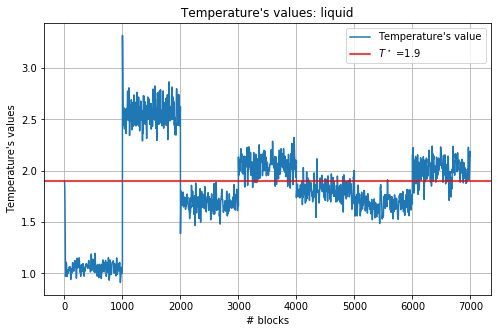

In [47]:
print(r"Input params: T=1.9, npar=108, rcut=2.5, rho=0.8")
Temp_liquid = 1.9
plot_insta("liquid",Temp_liquid)

Possiamo vedere come il training porti il nostro algoritmo ad equilibrarsi (abbiamo preso come esempio la temperatura e sono state fatte 1000 misure per ogni simulazione). Vediamo che le prime due simulazioni sono molto distanti dal valore desiderato $T^\star=1.9$ (dato estratto dal file <font face="Courier">input.liquid</font>). Con i successivi restart possiamo vedere che le misure di $T$ oscillino attorno a $T^\star$ e possiamo quindi assumere che il nostro algoritmo sia andato ad equilibrarsi.

Cicli per equilibrazione ----> 4

* Solid

Input params: T=1.4, npar=108, rcut=2.2, rho=1.1


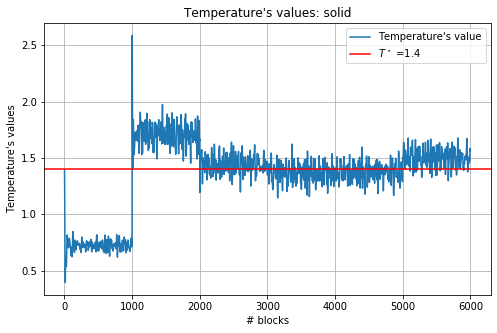

In [49]:
print(r"Input params: T=1.4, npar=108, rcut=2.2, rho=1.1")
Temp_solid = 1.4
plot_insta("solid",Temp_solid)

Possiamo vedere come il training porti il nostro algoritmo ad equilibrarsi (abbiamo preso come esempio la temperatura e sono state fatte 1000 misure per ogni simulazione). Vediamo che le prime due simulazioni sono molto distanti dal valore desiderato $T^\star=1.4$ (dato estratto dal file <font face="Courier">input.solid</font>). Con i successivi restart possiamo vedere che le misure di $T$ oscillino attorno a $T^\star$ e possiamo quindi assumere che il nostro algoritmo sia andato ad equilibrarsi.

Cicli equilibrazione ---> 3

## <span style="color:green"> Esercizio 4.2</span>

### Python code

Ridefinisco funzioni per lettura e plot per 4.2.

In [50]:
# read
def read(state,mes):
    sum_prog, err_prog = np.loadtxt("4.2/data/ave_"+mes+"_"+state+".dat",\
                                    usecols=(0,1), delimiter=' ', unpack='true')
    return sum_prog, err_prog
# plot
def plot_termo(state):
    type = ['epot','ekin','temp','etot']
    ec = ['orange','green','red','purple']
    h=0
    L=100
    block=100
    x = np.arange(1,100+1) 
    # Definisco le dimensioni del grafico
    fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(14,8),gridspec_kw=dict(wspace=0.16, hspace=0.4))
    # Il "for" per creare i tre grafici più il fitting sull'ultimo vettore v100
    for i in range(2):
        for j in range (2):
            sum_prog, err_prog = read(state,type[h])
            ax[i,j].errorbar(x,sum_prog,yerr=err_prog, color='blue', ecolor=''+ec[h],\
                            label=''+type[h])
            ax[i,j].set_xlabel(f'# blocks (N={block})')
            ax[i,j].set_title(type[h]+f'\'s average values: blocks={block}, nmis in each blk={L}')
            ax[i,j].grid(True)
            ax[i,j].legend()
            h+=1
    plt.show()

Input params: T=1.9, npar=108, rcut=2.5, rho=0.8


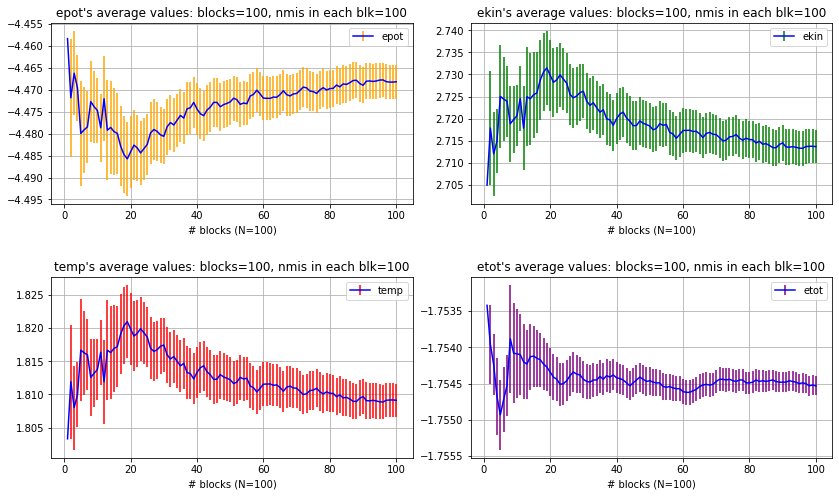

In [51]:
print(r"Input params: T=1.9, npar=108, rcut=2.5, rho=0.8")
plot_termo("liquid")

Input params: T=1.4, npar=108, rcut=2.2, rho=1.1


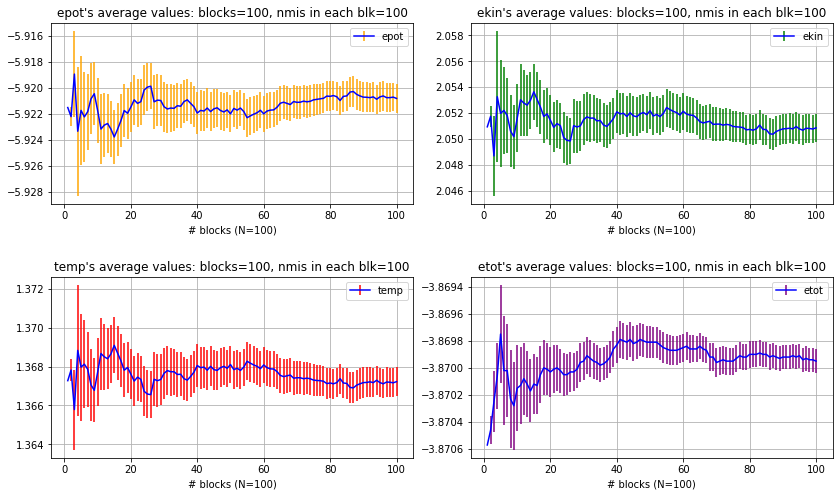

In [52]:
print(r"Input params: T=1.4, npar=108, rcut=2.2, rho=1.1")
plot_termo("solid")

## <span style="color:green"> Esercizio 4.3</span>

### Python code

Ridefinisco funzioni di lettura e plot per l'esercizio 4.3. Tutti i dati sono caricati dagli output del codice C++ contenuti nella directory `data`. (Hanno la stessa composizione dei file di 4.2). Inoltre introduco le funzioni per passare da Lennard-Jones a SI. Per mostrare poi che il sistema è equilibrato vengono plottati i valori istantanei della temperatura della simulazione di misura.

In [79]:
# Lennard-Jones --> SI.
sigma = 3.4 * 10**(-10) #m
epsilon = 1.657 * 10**(-21) #J
m = 6.686 * 10**(-26) # Kg
T_conv = 120 #K, Temperature scaling

import sys
def conv_LJ_SI(pot,x):
    if pot=='temp':
        x *= T_conv
    else:
        x *= epsilon
    return x

In [82]:
# read insta
def read_insta(state):
    x = np.loadtxt("4.3/data/output_temp_"+state+".dat")
    return x 
# plot
def plot_insta(state,temp):
    fig = plt.figure()
    fig.set_size_inches(8,5)
    x = read_insta(state)
    x = conv_LJ_SI('temp',x)
    temp = conv_LJ_SI('temp',temp)
    plt.plot(x, label='Temperature\'s value')
    plt.axhline(y=temp, color='r', linestyle='-', label=f'$T^\star$ ={temp}')
    plt.xlabel('# blocks')
    plt.ylabel('Temperature\'s values')
    plt.title('Temperature\'s values: '+state)
    plt.grid(True)
    plt.legend()
    plt.show()

def read_termo(state,mes):
    sum_prog, err_prog = np.loadtxt("4.3/data/ave_"+mes+"_"+state+".dat",\
                                    usecols=(0,1), delimiter=' ', unpack='true')
    return sum_prog, err_prog
# plot
def plot_termo(state):
    type = ['epot','ekin','temp','etot']
    ec = ['orange','green','red','purple']
    h=0
    L=100
    block=100
    x = np.arange(1,100+1) 
    # Definisco le dimensioni del grafico
    fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(14,8),gridspec_kw=dict(wspace=0.16, hspace=0.4))
    # Il "for" per creare i tre grafici più il fitting sull'ultimo vettore v100
    for i in range(2):
        for j in range (2):
            sum_prog, err_prog = read_termo(state,type[h])
            sum_prog = conv_LJ_SI(type[h],sum_prog)
            err_prog = conv_LJ_SI(type[h],err_prog)
            ax[i,j].errorbar(x,sum_prog,yerr=err_prog, color='blue', ecolor=''+ec[h],\
                            label=''+type[h])
            ax[i,j].set_xlabel(f'# blocks (N={block})')
            ax[i,j].set_title(type[h]+f'\'s average values: blocks={block}, nmis in each blk={L}')
            ax[i,j].grid(True)
            ax[i,j].legend()
            h+=1
    plt.show()

* Gas

Input params: T=144 K, npar=108, (LJ)rcut=5.0, rho=0.05


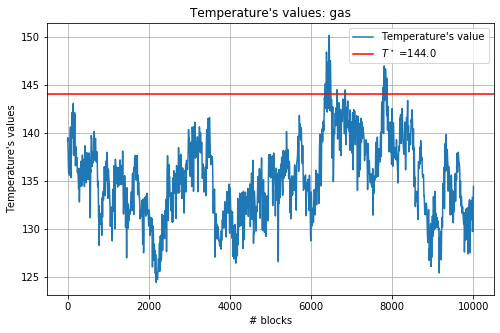

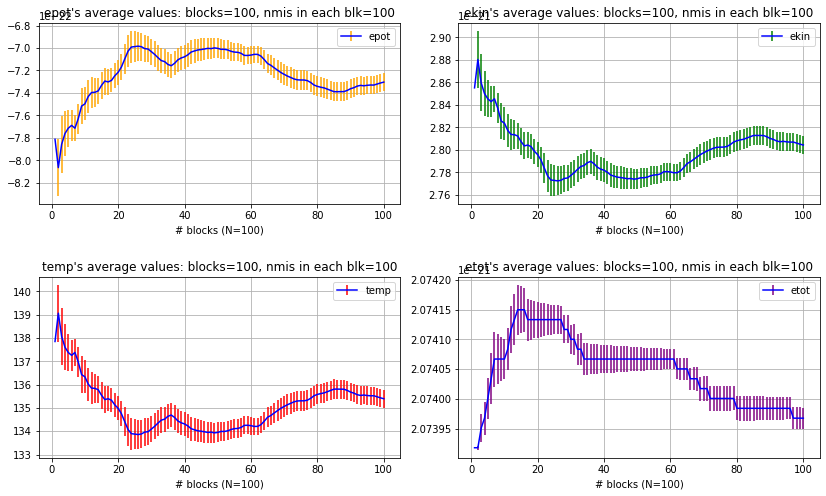

In [83]:
print(r"Input params: T=144 K, npar=108, (LJ)rcut=5.0, rho=0.05")
plot_insta("gas",1.2)
plot_termo("gas")

* Liquid

Input params: T=132, npar=108, (LJ)rcut=2.5, rho=0.8


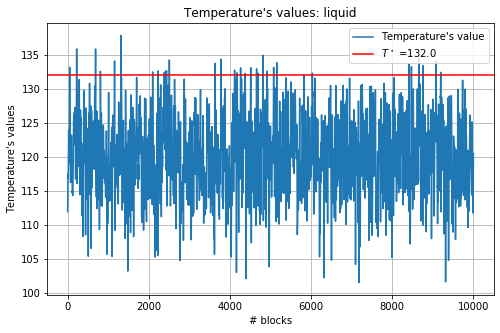

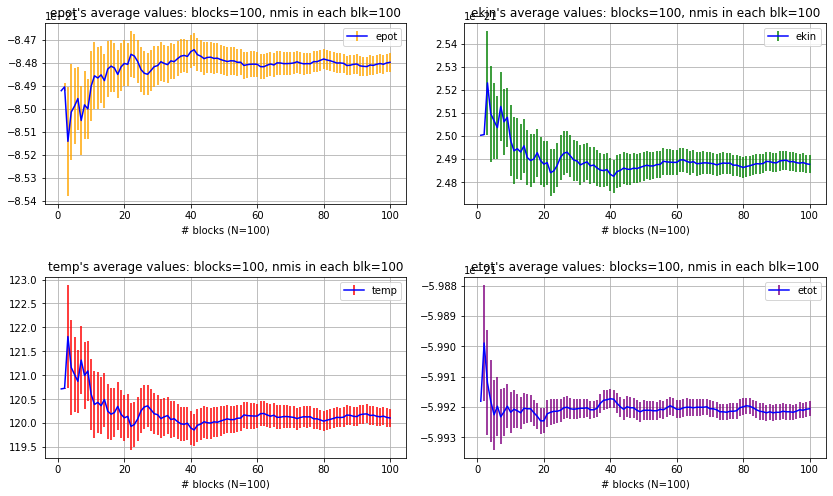

In [85]:
print(r"Input params: T=132, npar=108, (LJ)rcut=2.5, rho=0.8")
plot_insta("liquid",1.1)
plot_termo("liquid")

* Solid

Input params: T=96, npar=108, (LJ)rcut=2.2, rho=1.1


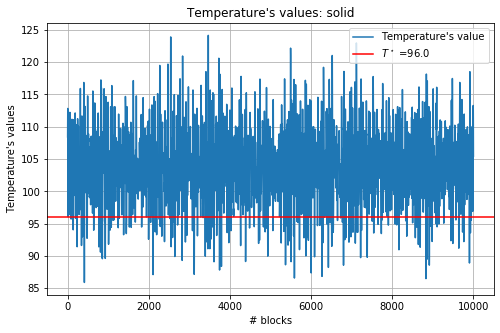

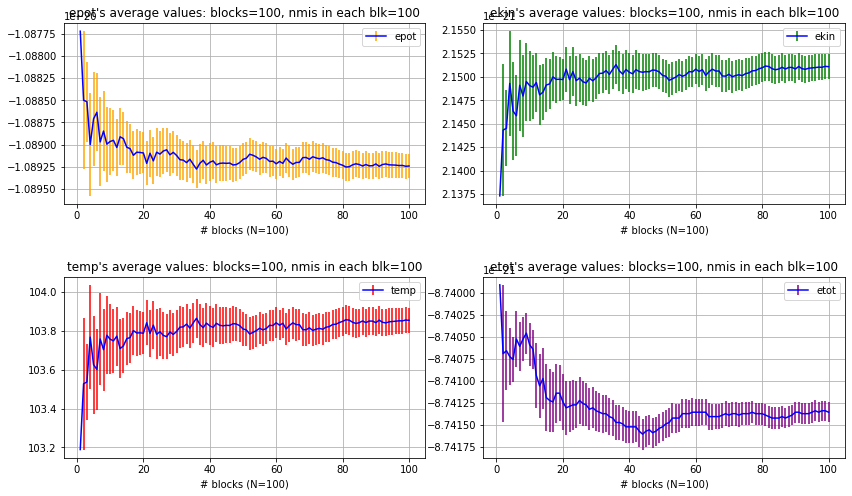

In [88]:
print(r"Input params: T=96, npar=108, (LJ)rcut=2.2, rho=1.1")
plot_insta("solid",0.8)
plot_termo("solid")